<div>
    <center><H1><B>Proyecto Integrador</B></H1></center>
</div>

**Maestría de Ciencias de Datos e Información**

**Integrantes:**

    Karen Itzel Velasco Chincoya,
    Martha Karina Terán Botello,
    Yuridiana de Jesús Reyes Delgado,

**Modelos Avanzados en Ciencia de Datos**

**Unidad 1 Actividad Proyecto Integrador**

Diciembre 3, 2022

<div>
    <center><H1><b>Contenido</b></H1></center>
</div>

<ol>
    <li>Introducción</li>
            <ol>
                <li>Datos generales del problema</li>
                <li>Desripción del problema</li>
                <li>Justificación</li>
            </ol>
    <li>Desarrollo</li>
        <ol>
            <li>Estado del arte</li>
            <li>Solución</li>
            <ol>
                <li>Extracción de los datos</li>
                <li>Exploración de los datos</li>
                <li>Relación de la variable objetivo con las demás variables presentes</li>
                <li>Aplicación de ingeniería de características para diseñar nuevas características en el conjunto de datos</li>
                <li>Principal Component Analysis</li>
                <li>Modelado de datos</li>
                <ul>
                    <li>Random Forest Classifier</li>
                    <li>Logistic Regression</li>
                    <li>K vecinos cercanos</li>
                </ul>
            </ol>
        </ol>
    <li>Conclusiones</li>
    <li>Referencias</li>
</ol>

<div>
    <center><H1><B>Introducción</B></H1></center>
</div>

<H3>Datos generales del problema:</H3>
</br>
<b>Proyecto Elegido</b>
</br>
<ul>
    <li><b>Nombre: </b>American Express - Default Prediction</li>
    <li><b>Enlace: </b>https://www.kaggle.com/competitions/amex-default-prediction</li>
</ul>

## Descripción del problema

El proyecto consiste en la predicción de incumplimiento de pago en las tarjetas de
crédito basándonos en un histórico de información de 18 meses, condicionada a un
plazo de 120 días para poder realizar el pago del saldo pendiente, en donde se
incluyen variables categóricas como:

<ul>
    <li>Delincuencia</li>
    <li>Pagos</li>
    <li>Gastos</li>
    <li>Equilibrio</li>
    <li>Riesgo</li>
</ul>

Los cuales se encuentran segmentados en entrenamiento, validación y conjuntos de
prueba que incluyen comportamientos de series de tiempo y la anonimidad de la información. Estas características están compartidas con el proyecto de investigación
gracias a las series de tiempo y los datos existentes, además de que los datos
corresponden a personas.

## Justificación 

El uso de las tarjetas de crédito en la actualidad se ha vuelto más común ya que evitan manejar efectivo y permiten realizar compras que se pueden pagar posteriormente, lo que incentiva en mayor medida el consumo. El inconveniente que presentan es que se puede incurrir en incumplimientos de pago, lo que ocasiona pérdidas para los bancos e instituciones que otorgan créditos, por lo que resulta muy útil poder predecir la probabilidad de que un cliente no pague el monto del saldo de su tarjeta de crédito.

La predicción de incumplimiento crediticio en función del análisis del perfil de un cliente permite optimizar las decisiones de préstamo, lo que conduce a una mejor experiencia del cliente y una mejor toma de decisiones por las instituciones que otorgan créditos.


<div>
    <center><H1><B>Desarrollo</B></H1></center>
</div>

## Estado del arte

### Historial: trabajos previos que sugieren soluciones


#### Predicting Credit Card Defaults with Machine Learning

En este estudio de caso se menciona de nuevo el impacto de este tema en la vida real
debido al aumento de estafas a los bancos a través de los créditos. Los datos que
utilizaron fueron del repositorio de UC Irvine.
Las visualizaciones fueron obtenidas de kaggle, por su parte, el modelo para la
solución fue escrito utilizando python, considerando la optimización y el performance en
todo el proceso. Al final, ellos obtuvieron un porcentaje de confianza del 95%, y en sus
palabras, este porcentaje puede ahorrar grandes cantidades de dinero.[1]

#### Credit Default Risk Prediction

La compañía alemana Record Evolution especializada en ciencia de datos e internet de
las cosas, en su estudio Credit Default Risk Prediction explican a detalle el
procedimiento para predecir el riesgo de incumplimiento de pago usando machine
learning. Abordan los diferentes factores a considerar para construir un modelo de
machine learning que tenga éxito, ya que no depende solamente de la selección del
método, sino que hay factores clave que contribuyen: no se puede obtener un modelo confiable de alto rendimiento del modelo de predicción sin una cantidad suficiente de
datos enriquecidos, el feature engineering que se debe aplicar, ya que consume la
mayor parte del tiempo de un problema de machine learning, la elección del modelo de
machine learning y las métricas de desempeño. Usaron como ejemplo el conjunto de
datos Home Credit Default Risk de Kaggle y compararon tres principales algoritmos:
regresión logística, árbol de decisión y árbol de decisión con boost, mencionando los
pros y contras de cada uno.

#### Optimize Cash Collection: Use Machine learning to Predicting Invoice Payment

En el paper llamado “Optimize Cash Collection: Use Machine learning to Predicting
Invoice Payment” se menciona como objetivo identificar el pago de facturas para
respaldar la toma de decisiones, presentando un prototipo que apoyaba a los
encargados de cobrar, alcanzando un 77% de precisión usando cinco clasificadores
como: Naive Bayes, Logistic Regression, “K-Nearest Neighbors, Random Forest” y
“Gardient Boosted Decision Trees”.
Esto para poder atender a los clientes que tengan dificultad de pago y poder
concentrarse en ellos y no descartarlos como clientes; podría segmentarse para
atenderlos de diferente manera sin perder rentabilidad como negocio.[3]

<div>
    <center><H1><B>Solución</B></H1></center>
</div>

In [ ]:
#Se importan las librerías a utilizar

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, decomposition, impute
from sklearn.experimental import enable_iterative_imputer


In [ ]:
# Se importan los archivos que serán utilizados desde la plataforma de kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Extracción de los datos 

En este trabajo se uso una muestra de 10,000 registros para los siguientes algoritmos, ya que el volumen de datos dificulta su procesamiento de manera local y dificulta la colaboración.

**Columnas:** Se eliminaron las columnas que no tuvieran al  menos 75% de valores, eliminando 23 Columnas.

**PCA:** Para trabajar con el número de columnas del dataset, se aplica Principal Componen Analysis para realizar una reducción.


In [ ]:
# Se cargan los archivos de datos proporcionados con la información crediticia de los usuarios
train_df_sample = pd.read_csv('content/train_df_sample.csv')
train_label_df = pd.read_csv('content/train_label_df.csv')
train_df = pd.merge(train_df_sample, train_label_df, how="inner", on=["customer_ID"])
test_df = pd.read_csv('content/test_df.csv')
sample_submission_df = pd.read_csv('content/sample_submission_df-2.csv')

# Exploración de los datos

In [ ]:
#Se visualiza información de cada conjunto de datos
print("-------- Archivo de Entrenamiento ----------")
print("Filas:",train_df.shape[0]," Columnas:",train_df.shape[1])
train_df.info()
display(train_df.head())
print("\n")


print("-------- Archivo de Pruebas ----------")
print("Filas:",test_df.shape[0]," Columnas:",test_df.shape[1])
test_df.info()
display(test_df.head())

-------- Archivo de Entrenamiento ----------
Filas: 10000  Columnas: 193
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 193 entries, Unnamed: 0_x to target
dtypes: float64(185), int64(4), object(4)
memory usage: 14.8+ MB


,Unnamed: 0_x,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,Unnamed: 0_y,target
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,...,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0,0
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,...,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0,0
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,...,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0,0
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,...,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0,0
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,...,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0,0




-------- Archivo de Pruebas ----------
Filas: 10000  Columnas: 191
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 191 entries, Unnamed: 0 to D_145
dtypes: float64(185), int64(2), object(4)
memory usage: 14.6+ MB


,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008281,NaN
1,1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,...,NaN,NaN,NaN,0.000142,0.004940,0.009021,NaN,0.003695,0.003753,0.001460
2,2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0.003326,0.016390,1.004620,0.000114,0.266976,0.004196,...,NaN,NaN,NaN,0.000074,0.002114,0.004656,NaN,0.003155,0.002156,0.006482
3,3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614911,0.009065,0.021672,0.816549,0.009722,0.188947,0.004123,...,NaN,NaN,NaN,0.004743,0.006392,0.002890,NaN,0.006044,0.005206,0.007855
4,4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591673,0.238794,0.015923,0.810456,0.002026,0.180035,0.000731,...,NaN,NaN,NaN,0.008133,0.004329,0.008384,NaN,0.001008,0.007421,0.009471


In [ ]:
#Aquí se agrupan y cuentan los registros por tipo de cliente
clientes = train_df.groupby('target').count().reset_index()
clientes['Conteo'] = clientes['customer_ID']
clientes = clientes.filter(['target','Conteo'])
clientes

,target,Conteo
0,0,7447
1,1,2553


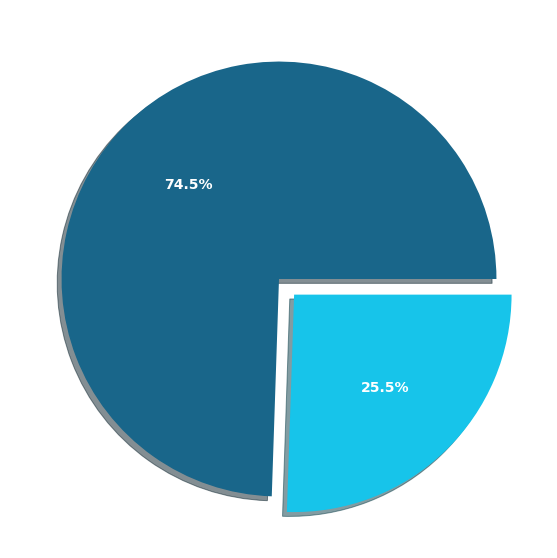

In [ ]:
#Se grafica el conteo de tipo de cliente identificado 
plt.figure(figsize=(20,10))
plt.pie(clientes['Conteo'],
        labels=clientes['target'],
        colors=['#19668A','#17C4EA'],
        shadow=True,
        explode=[0, 0.1],
        autopct='%1.1f%%',
        textprops=dict(color="w", weight="bold", size=14)
       )
plt.show()


In [ ]:
#Se identifican los registros por año
anios = pd.to_datetime(test_df['S_2']).dt.year
anios

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
9995    2018
9996    2018
9997    2018
9998    2019
9999    2019
Name: S_2, Length: 10000, dtype: int64

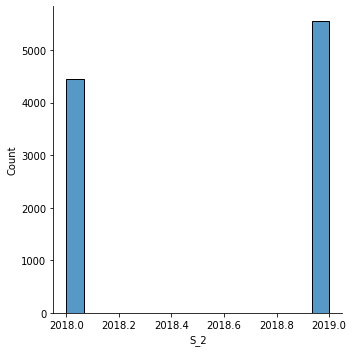

In [ ]:
#Se genera la gráfica correspondiente para indicar los los diferentes años de información con los que se cuenta.
grafica_barras = sns.displot(anios)

## Relación de la variable objetivo con las demás variables presentes

La relación es que las diferentes variables indicadas de los rubros de **Delincuencia (D), Gasto (S), Pago (P), Saldo (B) y Riesgo (R)** nos permiten calificar la capacidad de pago de un cliente o no.

Las registros que tienen un target=1(Pago) representa el 25.4% mientras que los que tienen un target=0(No pago) son el 74.6% 

## Variables mayormente correlacionadas con el objetivo
 

In [ ]:
#Se define la variable con las columnas con más relación con el objetivo.
columnas_categoricas = train_df[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64','D_68']]
columnas_categoricas

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_68
0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
1,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
2,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
3,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
4,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,3.0,0.0,0.0,-1.0,0.0,1.0,CR,O,6.0
9996,0.0,3.0,0.0,0.0,-1.0,0.0,1.0,CR,O,6.0
9997,0.0,2.0,1.0,0.0,-1.0,0.0,1.0,CO,O,6.0
9998,0.0,3.0,1.0,0.0,-1.0,0.0,1.0,CO,O,6.0


In [ ]:
# Se sumarizan las columnas categóricas que son nulas
columnas_categoricas.isnull().sum()
columnas_categoricas

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_68
0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
1,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
2,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
3,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
4,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,6.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,3.0,0.0,0.0,-1.0,0.0,1.0,CR,O,6.0
9996,0.0,3.0,0.0,0.0,-1.0,0.0,1.0,CR,O,6.0
9997,0.0,2.0,1.0,0.0,-1.0,0.0,1.0,CO,O,6.0
9998,0.0,3.0,1.0,0.0,-1.0,0.0,1.0,CO,O,6.0


In [ ]:
#Se codifican las etiquetas con valor entre 0 y n-1 y se devuelve las etiquetas codificadas
LabelEncoder = preprocessing.LabelEncoder()
columnas_categoricas = columnas_categoricas.apply(LabelEncoder.fit_transform)
columnas_categoricas

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_68
0,0,1,1,0,4,0,2,2,1,6
1,0,1,1,0,4,0,2,2,1,6
2,0,1,1,0,4,0,2,2,1,6
3,0,1,1,0,4,0,2,2,1,6
4,0,1,1,0,4,0,2,2,1,6
...,...,...,...,...,...,...,...,...,...,...
9995,0,2,0,0,0,0,2,2,1,6
9996,0,2,0,0,0,0,2,2,1,6
9997,0,1,1,0,0,0,2,1,1,6
9998,0,2,1,0,0,0,2,1,1,6


In [ ]:
#Se codifican las variables categóricas como una única matriz numérica y se guarda en un arreglo
Encoder = preprocessing.OneHotEncoder()
Encoder.fit(columnas_categoricas)
ohl = Encoder.transform(columnas_categoricas).toarray()
ohl

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
#Se obtiene el listado de los nombres de las variables categóricas
nombres_columnas_categoricas = Encoder.get_feature_names_out(list(columnas_categoricas.columns))
nombres_columnas_categoricas

array(['B_30_0', 'B_30_1', 'B_30_2', 'B_38_0', 'B_38_1', 'B_38_2',
       'B_38_3', 'B_38_4', 'B_38_5', 'B_38_6', 'D_114_0', 'D_114_1',
       'D_114_2', 'D_116_0', 'D_116_1', 'D_116_2', 'D_117_0', 'D_117_1',
       'D_117_2', 'D_117_3', 'D_117_4', 'D_117_5', 'D_117_6', 'D_117_7',
       'D_120_0', 'D_120_1', 'D_120_2', 'D_126_0', 'D_126_1', 'D_126_2',
       'D_126_3', 'D_63_0', 'D_63_1', 'D_63_2', 'D_63_3', 'D_63_4',
       'D_63_5', 'D_64_0', 'D_64_1', 'D_64_2', 'D_64_3', 'D_64_4',
       'D_68_0', 'D_68_1', 'D_68_2', 'D_68_3', 'D_68_4', 'D_68_5',
       'D_68_6', 'D_68_7'], dtype=object)

In [ ]:
#Se genera el conjunto de datos de las variables categóricas
df_cc = pd.DataFrame(ohl,columns=nombres_columnas_categoricas)
df_cc

,B_30_0,B_30_1,B_30_2,B_38_0,B_38_1,B_38_2,B_38_3,B_38_4,B_38_5,B_38_6,...,D_64_3,D_64_4,D_68_0,D_68_1,D_68_2,D_68_3,D_68_4,D_68_5,D_68_6,D_68_7
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Se crea el conjunto de datos de entrenamiento con las variables categóricas 
train_df = train_df.drop(columns = columnas_categoricas.columns)
train_df = train_df.join(df_cc)
train_df

,Unnamed: 0_x,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_3,D_64_4,D_68_0,D_68_1,D_68_2,D_68_3,D_68_4,D_68_5,D_68_6,D_68_7
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-02-26,0.331150,1.472028,0.049780,0.187973,0.000417,0.143625,0.955153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,9996,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-03-19,0.361060,2.065567,0.048313,0.194930,0.006775,0.144908,1.252287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,9997,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-03-28,0.708199,0.357349,0.013953,1.002573,0.003448,0.110258,0.170252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,9998,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-04-15,0.692401,0.009380,0.018337,0.588057,0.001596,0.108820,0.177197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Se crean los conjuntos de datos de entrenamiento para "x" y para "y"
train_df_x = train_df.drop(columns=['target'])
train_df_y = train_df[['target']]

In [ ]:
#Se crea el conjunto de datos de entrenamiento para aplicar Principal Component Analysis
train_df_PCA = train_df_x.drop(columns=['customer_ID','S_2'])

In [ ]:
# Se genera la variable para la estimación de cada característica a partir de las demás.
mv = impute.IterativeImputer()

In [ ]:
#Se aplica el ajuste y la transformación 
train_df_x_impute = mv.fit_transform(train_df_PCA)
train_df_x_impute

array([[0.00000000e+00, 9.38468719e-01, 1.73333900e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.36664605e-01, 5.77544307e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 9.54180277e-01, 9.15053968e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99700000e+03, 7.08198594e-01, 3.57349217e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99800000e+03, 6.92401424e-01, 9.38038431e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99900000e+03, 7.79089561e-01, 4.45051691e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
#Se genera el conjunto de los datos ya transformados.
train_df_x_impute_df = pd.DataFrame(train_df_x_impute,columns=list(train_df_PCA.columns))

In [ ]:
#Se genera la tabla de correlaciones de las variables categóricas
correlation = columnas_categoricas.corr()
correlation

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_68
B_30,1.000000,0.552650,-0.107343,-0.039710,-0.101645,0.036912,-0.048972,-0.087249,0.089850,-0.098154
B_38,0.552650,1.000000,-0.165780,-0.127780,-0.168237,-0.015177,-0.074441,-0.096441,0.062872,-0.140624
D_114,-0.107343,-0.165780,1.000000,0.433167,0.199741,0.244399,0.221030,0.023940,-0.177099,0.316220
D_116,-0.039710,-0.127780,0.433167,1.000000,0.363936,0.697978,0.181348,0.004882,0.386644,0.235788
D_117,-0.101645,-0.168237,0.199741,0.363936,1.000000,0.207880,0.118046,0.003531,-0.080536,0.158986
D_120,0.036912,-0.015177,0.244399,0.697978,0.207880,1.000000,0.089669,-0.022383,0.334884,0.068663
D_126,-0.048972,-0.074441,0.221030,0.181348,0.118046,0.089669,1.000000,0.044564,-0.029564,0.216136
D_63,-0.087249,-0.096441,0.023940,0.004882,0.003531,-0.022383,0.044564,1.000000,0.013637,0.019347
D_64,0.089850,0.062872,-0.177099,0.386644,-0.080536,0.334884,-0.029564,0.013637,1.000000,-0.130481
D_68,-0.098154,-0.140624,0.316220,0.235788,0.158986,0.068663,0.216136,0.019347,-0.130481,1.000000


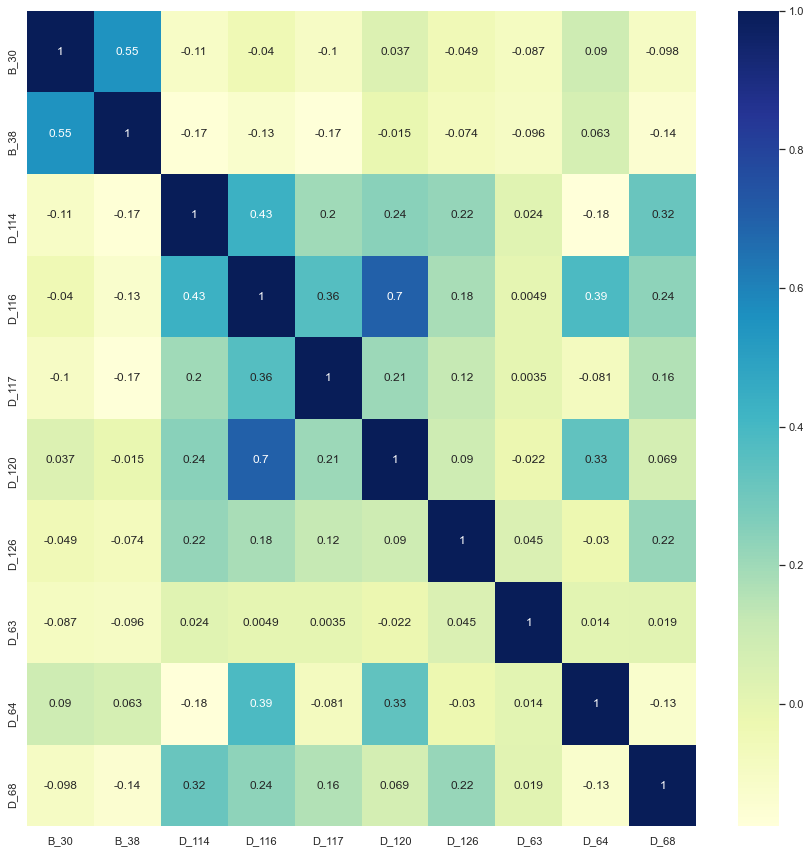

In [ ]:
#Se grafica la tabla de correlaciones
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

# Aplicación de ingeniería de características para diseñar nuevas características en el conjunto de datos 

## Principal Components Analysis

Consiste en la reducción de las dimensiones permitiendo simplificar la complejidad de los conjuntos de datos con múltiples dimensiones conservando la información. 

In [ ]:
#Se aplica PCA con 20 componentes 
pca = decomposition.PCA(n_components=20)
train_df_x_impute_pca = pca.fit_transform(train_df_x_impute_df)

In [ ]:
#Se genera el conjunto de datos con el PCA aplicado
train_df_x_impute_pca = pd.DataFrame(train_df_x_impute_pca,columns=[f'col_{n}' for n in range(train_df_x_impute_pca.shape[1])])
train_df_x_impute_pca

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,-5016.429389,5.029293,-0.566677,-1.759818,-0.169616,0.063979,0.728013,-1.752771,0.402176,-0.068325,0.533156,1.032882,0.774191,0.393020,-0.405115,0.066140,0.235858,-0.639334,0.181547,0.555393
1,-5015.432777,5.042492,-0.564935,-1.770769,-0.171855,0.060605,0.722809,-1.755310,0.314478,-0.077088,0.530764,1.031519,0.766951,0.391493,-0.402528,0.060815,0.248525,-0.635898,0.187332,0.546508
2,-5014.436167,5.065250,-0.565415,-1.789775,-0.166162,0.064811,0.679344,-1.828674,0.231295,-0.064906,0.508102,1.022067,0.880152,0.341746,-0.385841,0.042201,0.281843,-0.672917,0.210016,0.506462
3,-5013.439551,5.071428,-0.563937,-1.761054,-0.171618,0.071222,0.751990,-1.797736,0.155637,-0.050851,0.484533,0.979067,0.780431,0.363358,-0.350482,0.033451,0.248776,-0.632955,0.203847,0.533330
4,-5012.442939,5.088302,-0.569223,-1.804569,-0.176044,0.059975,0.733709,-1.796809,0.070428,-0.054030,0.482624,0.994091,0.795248,0.365773,-0.365519,0.007540,0.261679,-0.640692,0.223705,0.527504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5012.479367,5.673911,-0.593855,-1.220974,6.725236,0.194878,-0.316639,-0.265520,0.558715,0.684453,-0.618069,0.523464,0.594162,1.206439,-0.582381,0.446121,-0.035398,0.093060,-1.082190,0.054091
9996,5013.475869,5.586829,-0.565340,-1.201878,1.565576,0.071175,-0.541059,-0.033063,0.513683,0.882049,-0.675842,0.770304,0.670439,1.413644,-0.671954,0.687487,-0.114987,0.169410,-1.236843,0.032794
9997,5014.555429,-4.035355,0.057812,-0.807884,-0.157564,0.173885,0.471653,-1.552127,0.524140,-0.075325,0.642242,0.835727,0.508665,-0.414667,-0.051522,0.003043,0.036980,0.040973,0.633627,0.308938
9998,5015.552075,-3.949420,0.072385,-0.645219,-0.108784,0.096649,0.076239,-1.126547,0.681394,0.224751,0.184394,1.137998,0.394656,-0.579832,-0.188674,-0.181721,-0.033051,0.438442,0.145008,-0.543798


In [ ]:
#Se realiza la unión del conjunto de datos de entrenamiento con el modelo PCA resultante.
train_df_pca = train_df_y.join(train_df_x[['customer_ID', 'S_2']]).join(train_df_x_impute_pca)
train_df_pca

,target,customer_ID,S_2,col_0,col_1,col_2,col_3,col_4,col_5,col_6,...,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,-5016.429389,5.029293,-0.566677,-1.759818,-0.169616,0.063979,0.728013,...,0.533156,1.032882,0.774191,0.393020,-0.405115,0.066140,0.235858,-0.639334,0.181547,0.555393
1,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,-5015.432777,5.042492,-0.564935,-1.770769,-0.171855,0.060605,0.722809,...,0.530764,1.031519,0.766951,0.391493,-0.402528,0.060815,0.248525,-0.635898,0.187332,0.546508
2,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,-5014.436167,5.065250,-0.565415,-1.789775,-0.166162,0.064811,0.679344,...,0.508102,1.022067,0.880152,0.341746,-0.385841,0.042201,0.281843,-0.672917,0.210016,0.506462
3,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,-5013.439551,5.071428,-0.563937,-1.761054,-0.171618,0.071222,0.751990,...,0.484533,0.979067,0.780431,0.363358,-0.350482,0.033451,0.248776,-0.632955,0.203847,0.533330
4,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,-5012.442939,5.088302,-0.569223,-1.804569,-0.176044,0.059975,0.733709,...,0.482624,0.994091,0.795248,0.365773,-0.365519,0.007540,0.261679,-0.640692,0.223705,0.527504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-02-26,5012.479367,5.673911,-0.593855,-1.220974,6.725236,0.194878,-0.316639,...,-0.618069,0.523464,0.594162,1.206439,-0.582381,0.446121,-0.035398,0.093060,-1.082190,0.054091
9996,1,007793144e0eeef1e29a7aa93244815328beb0d46ccbe3...,2018-03-19,5013.475869,5.586829,-0.565340,-1.201878,1.565576,0.071175,-0.541059,...,-0.675842,0.770304,0.670439,1.413644,-0.671954,0.687487,-0.114987,0.169410,-1.236843,0.032794
9997,0,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-03-28,5014.555429,-4.035355,0.057812,-0.807884,-0.157564,0.173885,0.471653,...,0.642242,0.835727,0.508665,-0.414667,-0.051522,0.003043,0.036980,0.040973,0.633627,0.308938
9998,0,0077b7efafef4cfa81e42538b87e39799e9928e47c6826...,2017-04-15,5015.552075,-3.949420,0.072385,-0.645219,-0.108784,0.096649,0.076239,...,0.184394,1.137998,0.394656,-0.579832,-0.188674,-0.181721,-0.033051,0.438442,0.145008,-0.543798


# Modelado de datos

Se modelan los datos de dos o más formas diferentes para comparar los resultados. 

En este caso se utilizan los algoritmos de aprendizaje supervisado y clasificadores:

- Random Forest Classifier
- Logistic Regression

In [ ]:
#Se generan las variables de entrenamiento "x" y "y"
x = train_df_pca.drop(columns=['target','customer_ID','S_2'])
y = train_df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
#Se imprimen los resultados de cada conjunto de entrenamiento y prueba
print("X_train  Filas:",X_train.shape[0]," Columnas:",X_train.shape[1])
print("X_test Filas:",X_test.shape[0]," Columnas:",X_test.shape[1])
print("y_train Filas:",y_train.shape)
print("y_test Filas:",y_test.shape)

X_train  Filas: 7500  Columnas: 20
X_test Filas: 2500  Columnas: 20
y_train Filas: (7500,)
y_test Filas: (2500,)


## Random Forest Classifier

Gran parte de los problemas en ciencia de datos son las clasificaciones, interesa saber a que clase o grupo pertenecen ciertas variables. La habilidad para determinar el grupo al que una variable forma parte es extremadamente valiosa. Uno de los algoritmos más exactos es el clasificador aleatorio de bosque. Árboles de decisión La base para comprender el clasificador de bosque son los árboles de decisión, lo que sucede en un árbol de decisión es evaluar el conjunto de valores iniciales por ronda, cada valor es evaluado con una pregunta, si la respuesta es sí, generalmente se va hacia la izquierda, si es no, hacia la derecha.

In [ ]:
#Se aplica el modelo de clasificación y predicción de Random Forrest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print()

# Se calcula la precisión del modelo
print("Accuracy del modelo: ", metrics.accuracy_score(y_test, y_pred))


Accuracy del modelo:  0.9664


## Logistic Regression

Este tipo de modelo generalmente se utiliza para la clasificación y el análisis predictivo. La regresión logística estima la probabilidad de que ocurra un evento, tal como votar o no votar dado un conjunto de datos independientes. Dado que la salida es la probabilidad, la variable dependiente está contenida entre 0 y 1.

In [ ]:
#Se aplica el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy del modelo: ", metrics.accuracy_score(y_test, y_pred))

Accuracy del modelo:  0.8552


/Users/kvelasco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K Nearest Neighbors (KNN) 

Es un algoritmo de aprendizaje automático muy simple y fácil de entender. KNN se utiliza en una variedad de aplicaciones entre ellas las calificaciones crediticias, donde las instituciones financieras predicen la calificación crediticia de los clientes. Es un algoritmo basado en el enfoque de similitud de características.

In [ ]:
# Se aplica el modelo clasificador de K-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy del modelo: ", metrics.accuracy_score(y_test, y_pred))

Accuracy del modelo:  0.9936


<div>
    <center><H1><B>Conclusiones</B></H1></center>
</div>

Este trabajo nos permitió poner en práctica lo revisado en los cursos de la plataforma Kaggle: exploración de datos, ingeniería de características y Modelos de ML principalmente, así como la visualización de los datos. 
Se seleccionó un tema donde el conjunto de datos era de un tamaño muy grande que resultaba complejo de manejar al ejecutar este notebook, por lo que se hizo un subconjunto para efectos de la codificación. 


Entre las técnicas que se utilizaron se encuentra la regresión logística, la cual es útil para realizar proyecciones y pronósticos, en este caso el resultado obtenido utilizando la métrica de accuracy fue de 86%, con el fin de mejorar el resultado se consideró necesario aplicar otros métodos como PCA y la correlación. 
El uso de PCA permitió analizar la relación entre variables, con el fin de apoyar el proceso de selección de atributos. De igual manera, se aplicó la técnica de la correlación con la cual también fue posible medir la dependencia entre las variables para conocer el grado de correlación entre éstas. 

Con el fin de comparar este estudio con otro modelo de ML, se utilizó el modelo de random forest, el cual según estudios de la literatura [4,5] destaca por su rendimiento en procesos de regresión y clasificación. El desempeño obtenido con random forest destacó del obtenido por el modelo de regresión lineal, logrando un 96.08%, no obstante, reconocemos que la selección de atributos obtenida anteriormente con PCA y el modelo de correlación apoyo para el resultado de este modelo.

Se continuó el análisis utilizando el modelo de K vecinos cercanos, con 3 vecinos, se obtuvo una métrica de 99.36%, aúm mejor que el 96.64% del modelo de Random Forest. 

A través de la realización de este ejercicio, pudimos darnos cuenta, que el mismo conjunto de datos tendrá diferentes medidas de exactitud dependiendo del método, el único punto a tener en mente ahora, es que se deben considerar todas las métricas al momento de elegir un algoritmo, incluyendo: f-score, precision, accuracy, recall. 

<div>
    <center><H1><B>Referencias</B></H1></center>
</div>

[1] Dominguez, M. (2021). Predicting credit cards Default with Machine Learning. Disponible en:
https://medium.com/swlh/predicting-credit-card-defaults-with-machine-learning-fcc8da2fdafb

[2] Record Evolution Company. (2020) Credit Default Risk Prediction. Disponible en:
https://www.record-evolution.de/en/blog/credit-default-risk-prediction/

[3] Appel, A. P., Oliveira, V., Lima, B., Louzada Malfatti, G., Figueredo de Santana, V., & De Paula, R.
(2019). Optimize Cash Collection: Use Machine learning to Predicting Invoice Payment. Recuperado de
https://arxiv.org/pdf/1912.10828.pdf

[4] Strobl, Carolin, et al. "Bias in random forest variable importance measures: Illustrations, sources and a solution." BMC bioinformatics 8.1 (2007): 1-21.

[5] Liu, Yanli, Yourong Wang, and Jian Zhang. "New machine learning algorithm: Random forest." International Conference on Information Computing and Applications. Springer, Berlin, Heidelberg, 2012.

[6] https://www.kaggle.com/code/girishkumarsahu/american-express-default-prediction-eda/notebook

[7] https://www.kaggle.com/code/girishkumarsahu/american-express-default-prediction-ml-model

[8] Jamieson Bolder, David. Credit-Risk Modelling: Theoretical Foundations, Diagnostic Tools, Practical Examples, and Numerical Recipes in Python. Springer 2018.

[9] IBM. (2022). What is logistic regression? Disponible en: https://www.ibm.com/topics/logistic-regression

[10] Yiu, T. (2019). Understanding random forest. Disponible en: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

[11] Condusef. (2022). 3.3 millones de reclamaciones por fraude se registran en el primer semestre del año. Disponible en: https://www.condusef.gob.mx/?p=contenido&idc=448&idcat=1
